# __Car Dealership Sales Trend Analysis__
---

 ## Executive Summary
 In a competitive automotive market, understanding sales performance and consumer behavior is crucial for dealerships and manufacturers. This analysis delves into car sales data to uncover insights on regional sales performance, weekly sales patterns, and manufacturer sales volumes. The goal is to equip decision-makers with concrete data to strategize effectively, optimizing inventory, marketing efforts, and sales strategies.

 
 ## Goal Statement
The study aims to dissect car sales data to identify key trends and performance metrics, with a particular focus on three primary objectives:

 * Determine which dealer region is generating the highest sales revenue, offering insights into regional market strengths.
 * Identify the day of the week when sales are at their peak in each region, providing a glimpse into consumer purchasing behavior and potential timing for promotional efforts.
 * Discover which car manufacturer (Company) achieves the highest count of cars sold, highlighting market leadership and consumer preferences.
 * Discover which model per car manufacturer (Company) performs the best based on total transactions. 
 
 ## Data Sources and Methodology
 Utilizing a dataset encompassing car sales transactions, this project employs statistical analysis and data visualization techniques.
 
 ## Expected Outcomes
 This analysis is poised to offer valuable insights into the dynamics of car sales, with expected outcomes including:
 * Identification of the leading dealer region in terms of sales revenue, pinpointing regional market dominance.
 * Insights into the best sales day of the week for each region, and best selling car manufacturer and model. These metrics will support the planning of sales strategies and promotional activities.
 * Identification of the top models for the leading companies.



## __Step 1:__ Importing Essential Libraries
---
 This initial step involves importing the necessary libraries, essential for our data analysis and visualization tasks. A confirmation message will appear once these libraries are successfully loaded, ensuring they're ready for use. 

In [1]:
import pandas as pd
import csv
import os
import tabulate as tb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print("Libraries imported successfully")

Libraries imported successfully


## __Step 2:__ Import The Data
---

In [19]:
# Step 1: Import data from a CSV file.
data = pd.read_csv("data/car_sales_data.csv")
print("Data imported successfully")
print("-----------------")

# Step 2: Define the table format for tabulate.
tablefmt = "rounded_grid"

# Step 3: Print the first 5 rows of the
print(data.head())
print("-----------------")

# Step 4: Print the shape of the data.
print("The shape of the data is: ", data.shape)

Data imported successfully
-----------------
         car_id sale_date gender   company       model transmission  \
0  C_CND_000001  1/2/2022   Male      Ford  Expedition         Auto   
1  C_CND_000002  1/2/2022   Male     Dodge     Durango         Auto   
2  C_CND_000003  1/2/2022   Male  Cadillac    Eldorado       Manual   
3  C_CND_000004  1/2/2022   Male    Toyota      Celica       Manual   
4  C_CND_000005  1/2/2022   Male     Acura          TL         Auto   

        color  sale_price  dealer_no  body_style dealer_region  
0       Black       26000  06457-3834        SUV     Northeast  
1       Black       19000  60504-7114        SUV         South  
2         Red       31500  38701-8047  Passenger     Northeast  
3  Pale White       14000  99301-3882        SUV     Northeast  
4         Red       24500  53546-9427  Hatchback         South  
-----------------
The shape of the data is:  (23906, 11)


## __Step 3:__ Inspect & Transform The Data
---


In [3]:
# print the data types of the columns
print(data.dtypes)

car_id           object
sale_date        object
gender           object
company          object
model            object
transmission     object
color            object
sale_price        int64
dealer_no        object
body_style       object
dealer_region    object
dtype: object


#### __**Update Data Types**__


In [4]:
# Step 1: Convert 'sale_price' to float, removing any commas.
data["sale_price"] = data["sale_price"].astype(str).str.replace(",", "").astype(float)

# Step 2: Convert 'sale_date' to datetime.
data["sale_date"] = pd.to_datetime(data["sale_date"])

# Step 3: Print the data types of all columns to verify changes.
print(data.dtypes)

car_id                   object
sale_date        datetime64[ns]
gender                   object
company                  object
model                    object
transmission             object
color                    object
sale_price              float64
dealer_no                object
body_style               object
dealer_region            object
dtype: object


#### Check Data for Duplicate and Null Values


In [5]:
# Step 1: Calculate the total number of missing values in the dataset.
missing_values = data.isnull().sum()
# Step 2: Identify and count duplicate rows in the dataset.
duplicates = data.duplicated().sum()
# Step 3: Print the total count of missing values in the dataset.
print("The sum of missing values in the data is: ", missing_values.sum())
# Step 4: Print the total count of duplicate rows in the dataset.
print("The sum of duplicates in the data is: ", duplicates)

# Since there are no duplicates or missing values, we can move on to the next step. Had there been either, the next step would be to clean the data to account for the issues.

The sum of missing values in the data is:  0
The sum of duplicates in the data is:  0


## __Step 4:__ Begin Exploring The Data
---


In [6]:
# Steps 1 & 2: Find the earliest and latest sale date in the data
min_sale_date = data["sale_date"].min().date()
max_sale_date = data["sale_date"].max().date()

# Step 3: Calculate the statistics for sale_price
sale_price_stats = data["sale_price"].describe()

# Step 4: Format the statistics with a dollar sign
sale_price_stats_formatted = sale_price_stats.map(
    lambda x: "${:,.2f}".format(x) if isinstance(x, (int, float)) else x
)

# Steps 5 - 9: Count the number of unique companies, models, dealer regions, and total transactions
num_unique_companies = data["company"].nunique()
num_unique_models = data["model"].nunique()
num_unique_regions = data["dealer_region"].nunique()
total_transactions = len(data)

# Step 10: Store the results in a list of lists
results = [
    ["Minimum Sale Date", min_sale_date],
    ["Maximum Sale Date", max_sale_date],
    ["Minimum Sale Price", sale_price_stats_formatted["min"]],
    ["Maximum Sale Price", sale_price_stats_formatted["max"]],
    ["Mean Sale Price", sale_price_stats_formatted["mean"]],
    ["Sale Price Standard Deviation", sale_price_stats_formatted["std"]],
    ["Number of Unique Companies", num_unique_companies],
    ["Number of Unique Models", num_unique_models],
    ["Number of Unique Dealer Regions", num_unique_regions],
    ["Total Transactions", total_transactions],
]

# Step 11: Print the results in a table format using tabulate
print("Exploratory Data Analysis Results:")
print("----------------------------------")
print(tb.tabulate(results, headers=["Statistic", "Value"], tablefmt="rounded_grid"))

Exploratory Data Analysis Results:
----------------------------------
╭─────────────────────────────────┬────────────╮
│ Statistic                       │ Value      │
├─────────────────────────────────┼────────────┤
│ Minimum Sale Date               │ 2022-01-02 │
├─────────────────────────────────┼────────────┤
│ Maximum Sale Date               │ 2023-12-31 │
├─────────────────────────────────┼────────────┤
│ Minimum Sale Price              │ $1,200.00  │
├─────────────────────────────────┼────────────┤
│ Maximum Sale Price              │ $85,800.00 │
├─────────────────────────────────┼────────────┤
│ Mean Sale Price                 │ $28,090.25 │
├─────────────────────────────────┼────────────┤
│ Sale Price Standard Deviation   │ $14,788.69 │
├─────────────────────────────────┼────────────┤
│ Number of Unique Companies      │ 30         │
├─────────────────────────────────┼────────────┤
│ Number of Unique Models         │ 154        │
├─────────────────────────────────┼────────────┤

#### Inspect The Number of Transactions Over Time

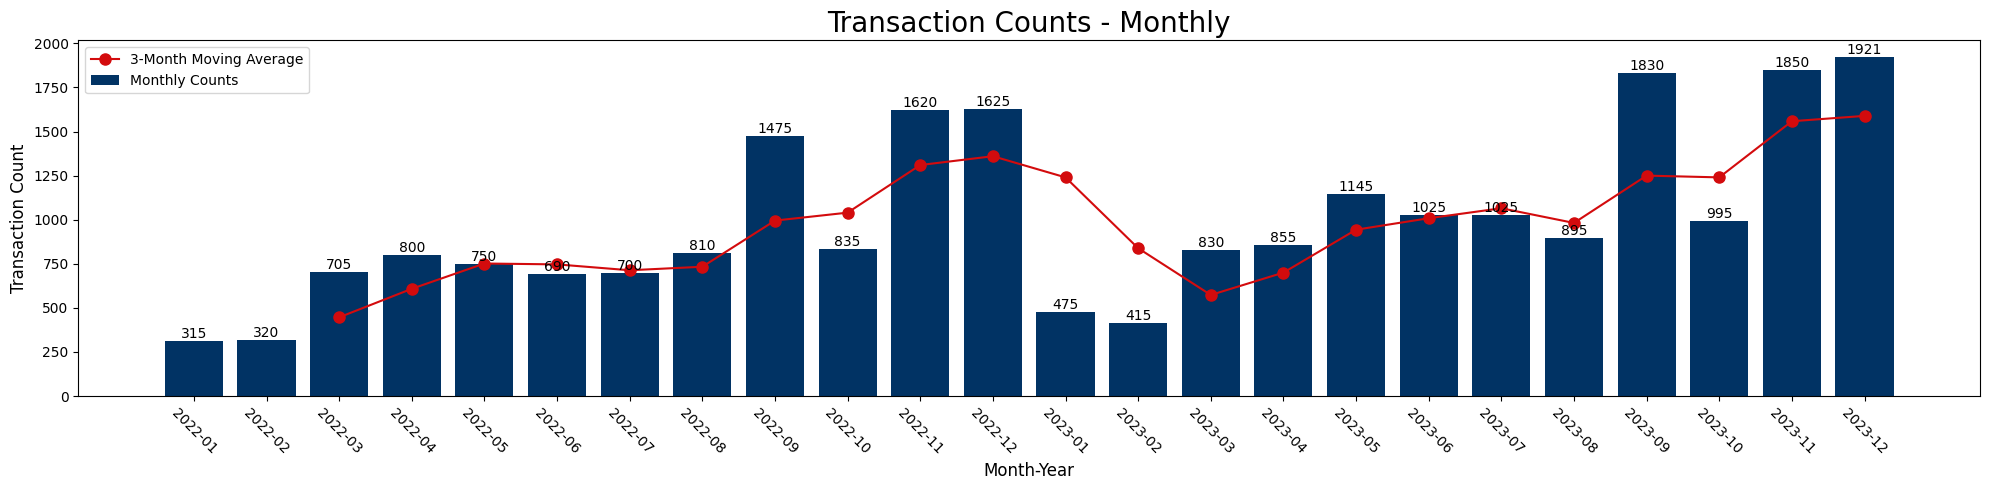

In [7]:
# Step 1: Convert 'Month_Year' from dates to strings for plotting.
data["Month_Year"] = data["sale_date"].dt.to_period("M").astype(str)

# Step 2: Count occurrences of each 'Month_Year' and sort them by date.
counts = data["Month_Year"].value_counts().sort_index()

# Step 3: Calculate the 3-month moving average of the counts.
moving_avg = counts.rolling(window=3).mean()

# Step 4: Plot the bar plot for monthly transaction counts.
plt.figure(figsize=(20, 5))
plt.bar(counts.index, counts.values, color="#013364", label="Monthly Counts")

# Step 5: Plot the line plot for the moving average of transaction counts.
plt.plot(
    moving_avg.index,
    moving_avg.values,
    color="#d30b0d",
    marker="o",
    markersize=8,
    label="3-Month Moving Average",
)

# Step 6: Add data labels to the bar plot.
for i, value in enumerate(counts.values):
    plt.text(counts.index[i], value, str(value), ha="center", va="bottom")

# Step 7: Customize the plot with titles, labels, and legends.
plt.title("Transaction Counts - Monthly", fontsize=20)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.xticks(counts.index, counts.index, rotation=-45)
plt.legend()
plt.tight_layout()

# Step 8: Display the plot.
plt.show()

#### Identify The Overall Breakdown of Transactions by Dealer Region


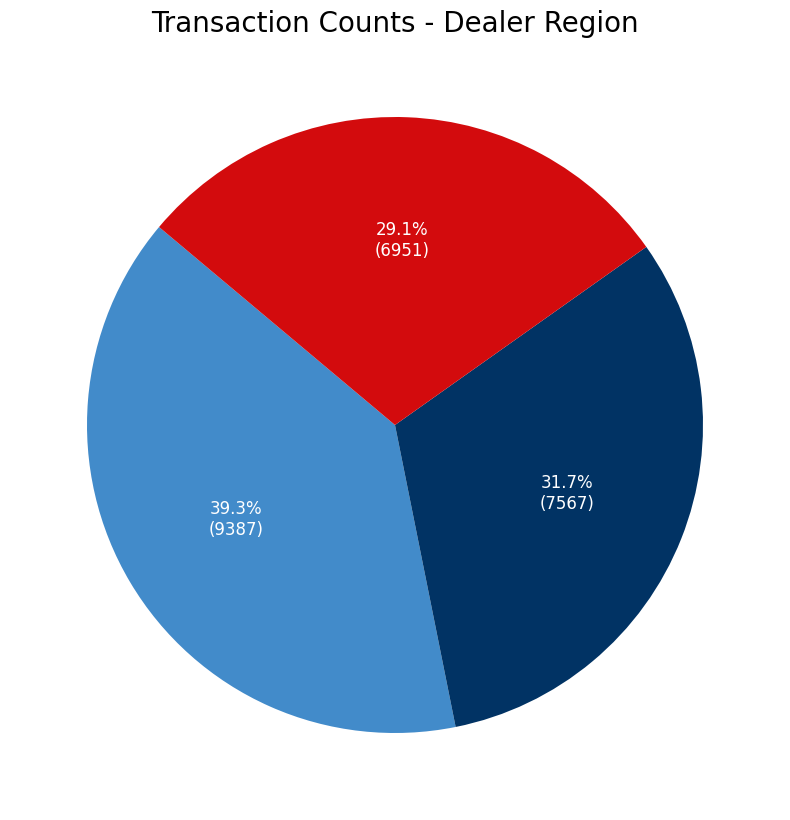

In [8]:
# Step 1: Define colors for the pie chart segments.
colors = [
    "#428bca",  # light blue for the first dealer region
    "#013364",  # dark blue for the second dealer region
    "#d30b0d",  # red for the third dealer region
]

# Step 2: Count the number of transactions for each dealer_region.
region_counts = data["dealer_region"].value_counts()

# Step 3: Set up the figure for the pie chart.
plt.figure(figsize=(10, 10))


# Step 4: Define a function to format the labels with percentage and actual number.
def autopct_format(pct):
    # Calculate the absolute number based on the percentage and total sum of region_counts.
    return f"{pct:.1f}%\n({int(pct/100*sum(region_counts))})"


# Step 5: Plot the pie chart with the transaction counts.
plt.pie(
    region_counts,  # The data to plot
    labels=region_counts.index,  # Labels for each segment
    autopct=autopct_format,  # Format for the labels inside the pie segments
    startangle=140,  # Starting angle to rotate the pie chart for better visual arrangement
    colors=colors,  # Colors for each segment
    labeldistance=1.05,  # Distance of labels from the center of the pie
    textprops={"color": "white", "fontsize": 12},  # Text properties for the labels
)

# Step 6: Set the title for the pie chart.
plt.title("Transaction Counts - Dealer Region", fontsize=20)

# Step 7: Display the pie chart.
plt.show()

## __Step 5:__ Find the Answer to "Which Region Had The Hightest Average Price Per Transaction?"
---

#### Calculate Average Price Per Dealer Region, And The Dealer Region Each Month With The Highest Average Price. 


In [9]:
# Step 1: Create the pivot table to aggregate the mean sale price by Month_Year and dealer_region.
pivot_table = data.pivot_table(
    index="Month_Year", columns="dealer_region", values="sale_price", aggfunc="mean"
)

# Step 2: Convert pivot_table values to float and format as currency without modifying the original pivot table.
pivot_table_formatted = pivot_table.applymap(
    lambda x: f"${x:,.2f}" if pd.notnull(x) else ""
)

# Step 3: Add a column to the formatted pivot table that shows the dealer_region with the highest average price per Month_Year.
highest_avg_price_region = pivot_table.idxmax(axis=1).rename(
    "Highest Avg Transaction Price"
)
pivot_table_formatted["Highest Avg Transaction Price"] = highest_avg_price_region

# Step 4: Rename the index of the formatted pivot table for clarity.
pivot_table_formatted.index.name = "Month-Year"

# Print the formatted pivot table using tabulate (Step 8).
print(
    "Pivot Table with Highest Average Transaction Price by Dealer Region and Month-Year:"
)
print(tb.tabulate(pivot_table_formatted, headers="keys", tablefmt=tablefmt))

# Steps 5 & 6: Determine and print the dealer region that had the highest count of months with the highest average transaction price.
# This involves calculating the highest average transaction price per month and counting how often each dealer region appears as having the highest average price.
ranked_regions = (
    highest_avg_price_region.value_counts().sort_values(ascending=False).reset_index()
)
ranked_regions.columns = ["Dealer Region", "Months With Highest Avg Price"]

# Step 7: Preparing and printing the final results using tabulate.
highest_count = ranked_regions.iloc[0]["Dealer Region"]
highest_count_value = ranked_regions.iloc[0]["Months With Highest Avg Price"]

# Step 6: Determine which dealer region had the highest count of months with the highest average transaction price.
highest_count = highest_avg_price_region.value_counts().idxmax()
highest_count_value = highest_avg_price_region.value_counts().max()

# Step 7: Prepare the data for tabulate, following the specified pattern.
dealer_region_highest_avg_price_data = [
    [
        "Dealer Region with the Most Months Having the Highest Average Transaction Price",
        "Number of Months",
    ],
    [highest_count, highest_count_value],
]
print("---------------------------------------------------------------")
# Step 8: Print the table using tabulate, assuming tablefmt has been defined earlier.
print(
    tb.tabulate(
        dealer_region_highest_avg_price_data, headers="firstrow", tablefmt=tablefmt
    )
)

Pivot Table with Highest Average Transaction Price by Dealer Region and Month-Year:
╭──────────────┬─────────────┬────────────┬────────────┬─────────────────────────────────╮
│ Month-Year   │ Northeast   │ South      │ West       │ Highest Avg Transaction Price   │
├──────────────┼─────────────┼────────────┼────────────┼─────────────────────────────────┤
│ 2022-01      │ $29,577.21  │ $28,866.54 │ $26,206.37 │ Northeast                       │
├──────────────┼─────────────┼────────────┼────────────┼─────────────────────────────────┤
│ 2022-02      │ $28,111.87  │ $26,414.88 │ $27,660.82 │ Northeast                       │
├──────────────┼─────────────┼────────────┼────────────┼─────────────────────────────────┤
│ 2022-03      │ $28,107.04  │ $25,544.60 │ $29,070.20 │ West                            │
├──────────────┼─────────────┼────────────┼────────────┼─────────────────────────────────┤
│ 2022-04      │ $29,161.41  │ $27,443.68 │ $28,414.12 │ Northeast                       │
├─────

## __Step 6:__ Find the Answer to "Which Dealer Region Had the Highest Sum of Sales?"
---

In [10]:
# Step 1: Create a pivot table to aggregate the total 'sale_price' for each 'Month_Year' and 'dealer_region'.

pivot_table = data.pivot_table(
    index="Month_Year", columns="dealer_region", values="sale_price", aggfunc="sum"
)

# Step 2: Compute which dealer region had the highest total sales price for each month.
highest_sum_sales_region = (pivot_table.idxmax(axis=1)).rename("Highest Sum of Sales")

# Step 3: Convert the values in the pivot table to millions for display purposes and format them as strings.
pivot_table_millions = pivot_table / 1e6
pivot_table_formatted = pivot_table_millions.applymap(
    lambda x: f"${x:.2f}M" if pd.notnull(x) else ""
)

# Step 4: Add the "Highest Sum Sales Price Region" column to the formatted pivot table for easy comparison.
pivot_table_formatted = pd.concat(
    [pivot_table_formatted, highest_sum_sales_region], axis=1
)

# Step 5: Rename the index of the formatted pivot table for clarity.
pivot_table_formatted.index.name = "Month-Year"

# Step 6: Print the formatted pivot table using 'tb.tabulate' for a clean, table-like format.
print(tb.tabulate(pivot_table_formatted, headers="keys", tablefmt=tablefmt))

# Separator for clarity in output.
print("------------------------")

# Step 7: Determine which dealer region had the highest sum of sales for the most months.
most_months_highest_sum_sales = highest_sum_sales_region.value_counts().idxmax()
num_months_highest_sum_sales = highest_sum_sales_region.value_counts().max()

# Step 8: Prepare the data for tabulate
dealer_region_highest_sales_data = [
    [
        "Dealer Region with the Most Months Having the Highest Sum of Sales",
        "Number of Months",
    ],
    [most_months_highest_sum_sales, num_months_highest_sum_sales],
]

# Step 9: Print the table using tabulate
print(
    tb.tabulate(dealer_region_highest_sales_data, headers="firstrow", tablefmt=tablefmt)
)

╭──────────────┬─────────────┬─────────┬─────────┬────────────────────────╮
│ Month-Year   │ Northeast   │ South   │ West    │ Highest Sum of Sales   │
├──────────────┼─────────────┼─────────┼─────────┼────────────────────────┤
│ 2022-01      │ $3.82M      │ $2.63M  │ $2.49M  │ Northeast              │
├──────────────┼─────────────┼─────────┼─────────┼────────────────────────┤
│ 2022-02      │ $3.57M      │ $2.40M  │ $2.82M  │ Northeast              │
├──────────────┼─────────────┼─────────┼─────────┼────────────────────────┤
│ 2022-03      │ $7.87M      │ $5.24M  │ $6.40M  │ Northeast              │
├──────────────┼─────────────┼─────────┼─────────┼────────────────────────┤
│ 2022-04      │ $9.24M      │ $6.20M  │ $7.30M  │ Northeast              │
├──────────────┼─────────────┼─────────┼─────────┼────────────────────────┤
│ 2022-05      │ $7.86M      │ $6.20M  │ $6.54M  │ Northeast              │
├──────────────┼─────────────┼─────────┼─────────┼────────────────────────┤
│ 2022-06   

## __Step 7:__ What Day of Week Is Best For Selling Cars In Each Region?
---

#### Calculate the number of transactions per day of week


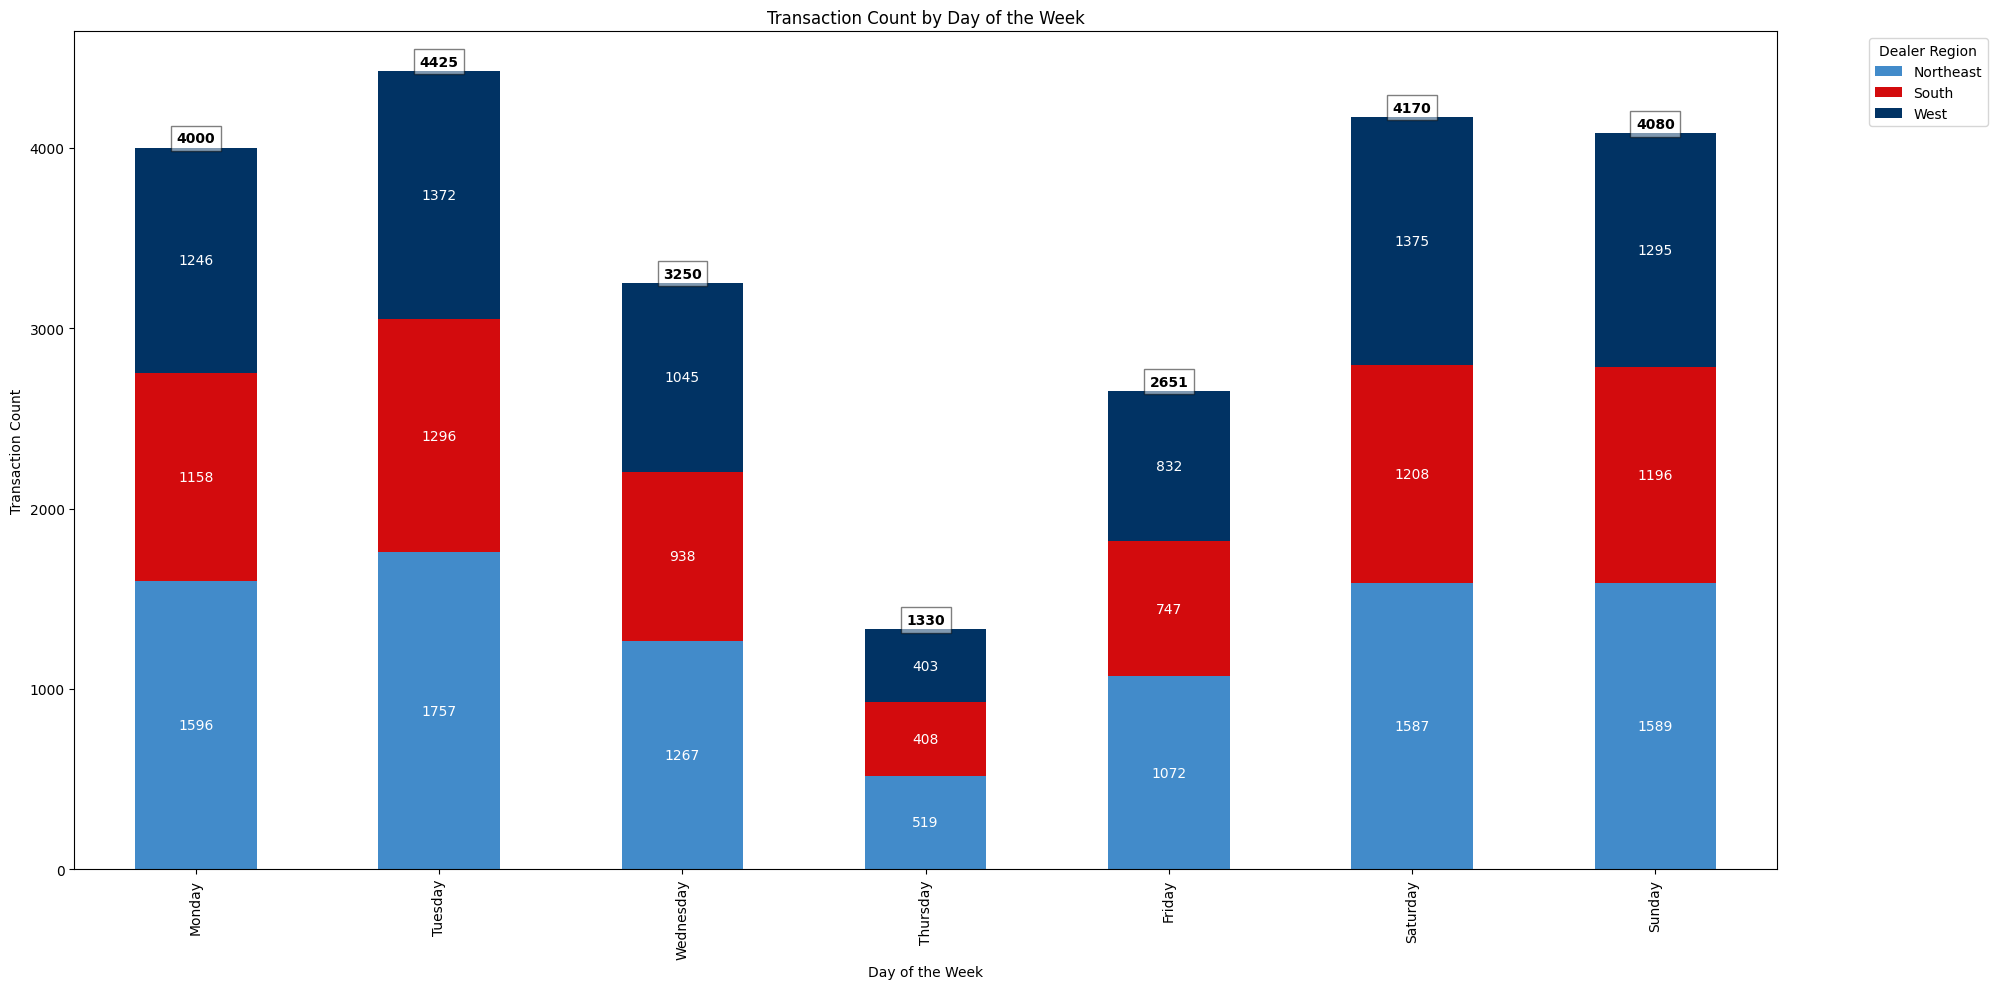

╭────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ The day of the week with the highest number of transactions is Tuesday with 4425 transactions.                     │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ For each dealer region, the day with the highest transactions and the respective transaction count are as follows: │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ - For the Northeast region, the day with the highest transactions was Tuesday with 1757 transactions.              │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ - For the South region, the day with the highest transactions was Tuesday with 1296 transactions.                  │
├───────────────────────────────────────────────

In [11]:
# Step 1: Create a pivot table to count transactions per day of the week and dealer region.
pivot_table = data.pivot_table(
    index=data["sale_date"].dt.day_name(),
    columns="dealer_region",
    values="car_id",
    aggfunc="count",
    fill_value=0,
)

# Step 2: Reorder the pivot table rows to start from Monday, ensuring the days of the week are in correct order.
pivot_table = pivot_table.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Step 3: Define a color for each dealer region to use in the visualization for clarity and visual distinction.
color_mapping = {
    "Northeast": "#428bca",  # Assigns light blue to Northeast
    "West": "#013364",  # Assigns dark blue to West
    "South": "#d30b0d",  # Assigns red to South
}

# Step 4: Apply sorting within each day for visualization purposes, sorting values within each row (day) in ascending order.
pivot_table = pivot_table.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Step 5: Generate a list of colors ordered according to the dealer regions in the pivot table.
ordered_colors = [color_mapping[region] for region in pivot_table.columns]

# Step 6: Plot a stacked bar chart showing the number of transactions per day for each dealer region.
# 'kind="bar"' specifies a bar chart, 'stacked=True' stacks the bars for each dealer region, and 'color=ordered_colors' applies our predefined colors.
ax = pivot_table.plot(kind="bar", stacked=True, figsize=(20, 10), color=ordered_colors)

# Step 7: Annotate the total transactions per day above each bar for an at-a-glance view of transaction volumes.
for i in range(len(pivot_table)):
    plt.text(
        x=i,
        y=pivot_table.iloc[i].sum() + 30,  # Position the text above the bar.
        s=pivot_table.iloc[i].sum(),  # The sum of transactions for the day.
        ha="center",  # Horizontally center the text.
        fontweight="bold",  # Bold the text for emphasis.
        bbox=dict(
            facecolor="white", alpha=0.5
        ),  # Add a semi-transparent white bubble around the text.
    )

# Step 8: Annotate the number of transactions per dealer region within the bars.
for i in range(len(pivot_table)):
    for j in range(len(pivot_table.columns)):
        plt.text(
            x=i,
            y=pivot_table.iloc[i, :j].sum()
            + pivot_table.iloc[i, j]
            / 2,  # Position the text in the middle of the bar segment.
            s=pivot_table.iloc[i, j],  # The number of transactions for the region.
            color="white",  # Set the text color to white for contrast.
            ha="center",  # Center the text horizontally within the bar segment.
            va="center",  # Center the text vertically within the bar segment.
        )

# Step 9: Customize the plot with titles and labels for clarity and presentation.
plt.title("Transaction Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Transaction Count")
plt.legend(
    title="Dealer Region", bbox_to_anchor=(1.05, 1), loc="upper left"
)  # Position the legend outside the plot.
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap.

plt.show()  # Display the plot.

# Step 10: Determine the overall highest transaction day and count.
highest_day = pivot_table.sum(axis=1).idxmax()
highest_day_count = pivot_table.sum(axis=1).max()

# Step 11: Prepare data for tabulate
# Create a list to store the results, starting with the overall highest transaction day
results = [
    [
        f"The day of the week with the highest number of transactions is {highest_day} with {highest_day_count} transactions."
    ]
]

# Step 12: Determine the day with the highest transactions for each dealer region and add to the results list
highest_day_per_region = pivot_table.idxmax()
highest_day_count_per_region = pivot_table.max()
results.append(
    [
        "For each dealer region, the day with the highest transactions and the respective transaction count are as follows:"
    ]
)

for region in pivot_table.columns:
    results.append(
        [
            f"- For the {region} region, the day with the highest transactions was {highest_day_per_region[region]} with {highest_day_count_per_region[region]} transactions."
        ]
    )

#  Step 13:Print the table using tabulate
print(tb.tabulate(results, tablefmt=tablefmt))

#### Calculate Best Day of Week Based on Average Transactions

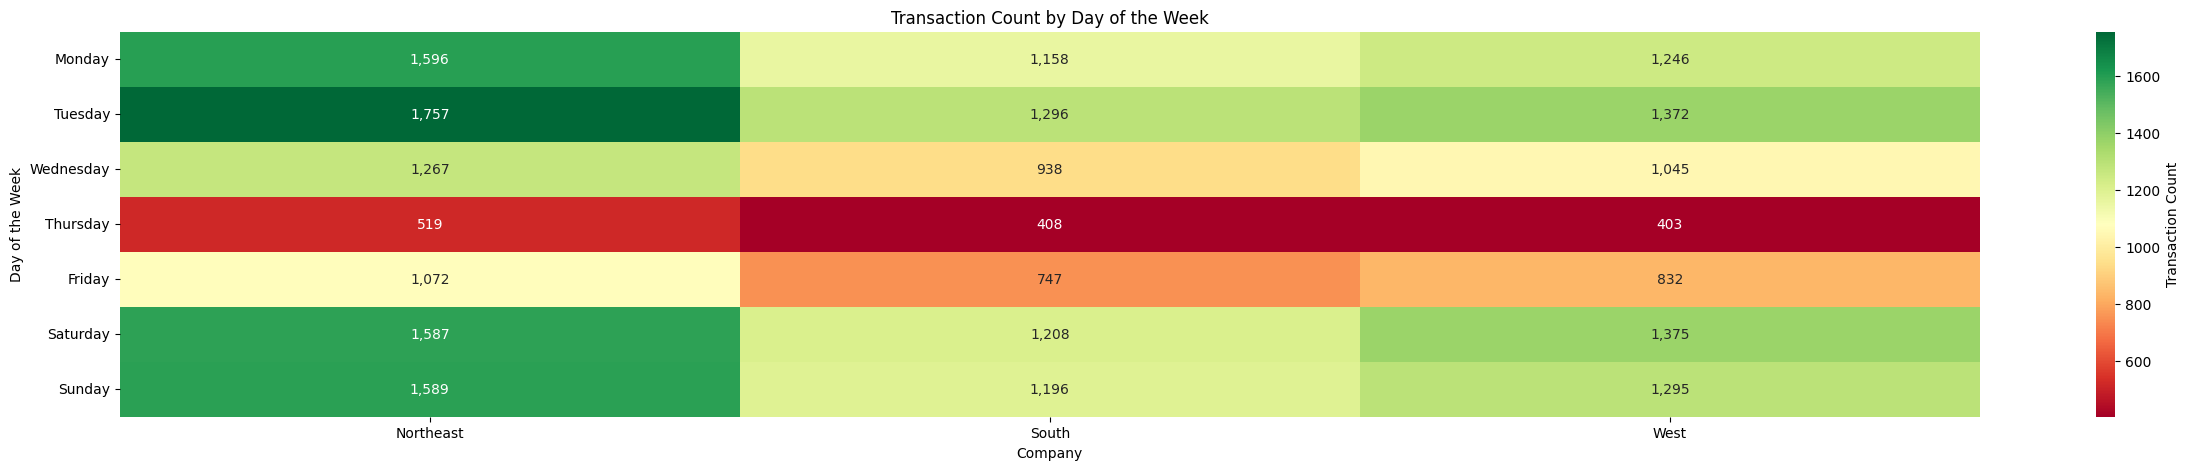

The optimal days for each dealer region are as follows:
╭─────────────────┬───────────────╮
│ Dealer Region   │ Optimal Day   │
├─────────────────┼───────────────┤
│ Northeast       │ Tuesday       │
├─────────────────┼───────────────┤
│ South           │ Tuesday       │
├─────────────────┼───────────────┤
│ West            │ Saturday      │
╰─────────────────┴───────────────╯


In [12]:
# Step 1: Create a pivot table to count transactions by company and day of the week.

pivot_table = pd.pivot_table(
    data,
    index=data["sale_date"].dt.day_name(),
    columns="dealer_region",
    values="car_id",
    aggfunc="count",
    fill_value=0,
)
# Step 2: Reorder the rows of the pivot table to start from Monday, ensuring the heatmap follows the logical order of the week.
pivot_table = pivot_table.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
# Step 3: Set up the figure for plotting.
plt.figure(figsize=(30, 5))

# Step 4: Create a heatmap from the pivot table.
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=",.0f",
    cmap="RdYlGn",
    cbar_kws={"label": "Transaction Count"},
)

# Step 5: Customize the heatmap with titles and labels for clarity.
plt.title("Transaction Count by Day of the Week")
plt.xlabel("Company")
plt.ylabel("Day of the Week")

# Step 6: Display the heatmap.
plt.show()

# Step 7: Calculate the day of the week with the highest average transaction count for each dealer region.
highest_avg_day = pivot_table.idxmax()

# Prepare data for tabulate
results = [["Dealer Region", "Optimal Day"]]
for region, day in highest_avg_day.items():
    results.append([region, day])
# Print the table using tabulate and leave tablefmt=tablefmt
print("The optimal days for each dealer region are as follows:")
print(tb.tabulate(results, headers="firstrow", tablefmt=tablefmt))

#### Best Day of Week Based on Average Daily Revenue 

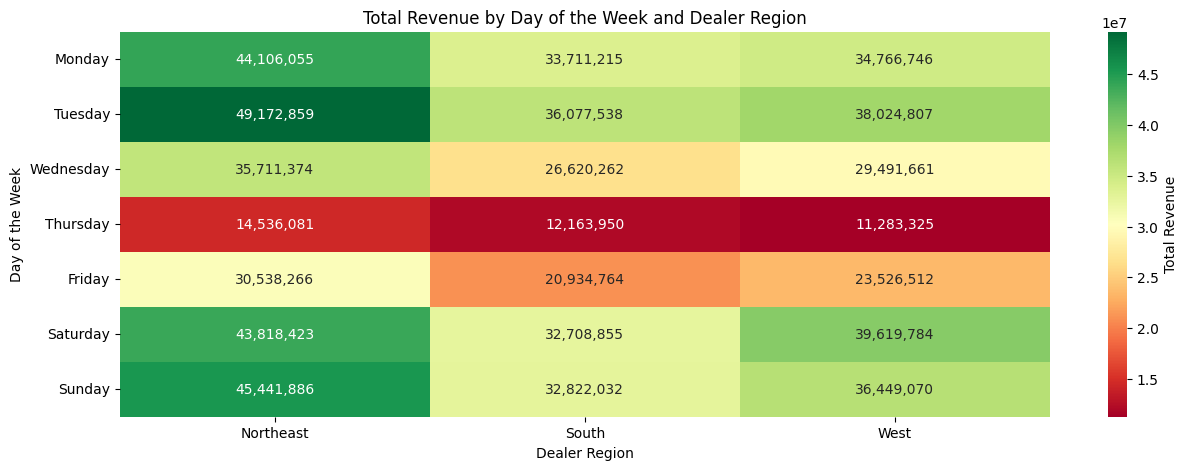

For each dealer region, the best sales day and associated revenue are as follows:
╭─────────────────┬──────────────────┬──────────────────────╮
│ Dealer Region   │ Best Sales Day   │ Associated Revenue   │
├─────────────────┼──────────────────┼──────────────────────┤
│ Northeast       │ Tuesday          │ $49,172,859.00       │
├─────────────────┼──────────────────┼──────────────────────┤
│ West            │ Saturday         │ $39,619,784.00       │
├─────────────────┼──────────────────┼──────────────────────┤
│ South           │ Tuesday          │ $36,077,538.00       │
╰─────────────────┴──────────────────┴──────────────────────╯


In [13]:
# Step 1: Create the pivot table
pivot_table = pd.pivot_table(
    data,
    index=data["sale_date"].dt.day_name(),
    columns="dealer_region",
    values="sale_price",
    aggfunc="sum",
    fill_value=0,
)

# Step 2: Reindex the pivot table
pivot_table = pivot_table.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Step 3: Create and display the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=",.0f",
    cmap="RdYlGn",
    cbar_kws={"label": "Total Revenue"},
)
plt.title("Total Revenue by Day of the Week and Dealer Region")
plt.xlabel("Dealer Region")
plt.ylabel("Day of the Week")
plt.show()

# Preparing for Step 4 & 5: Calculate the necessary variables
highest_day = pivot_table.sum(axis=1).idxmax()
highest_day_revenue = pivot_table.sum(axis=1).max()
highest_day_per_region = pivot_table.idxmax()
highest_day_revenue_per_region = pivot_table.max()

## Step 4: Prepare and print the data for the day with the highest total sales revenue
highest_day_data = [
    ["Highest Total Revenue Day", highest_day, f"${highest_day_revenue:,.2f}"]
]


# Step 5: Prepare and print the data for the best sales day for each dealer region
dealer_region_data = [
    ["Dealer Region", "Best Sales Day", "Associated Revenue"],
    [
        "Northeast",
        highest_day_per_region["Northeast"],
        f"${highest_day_revenue_per_region['Northeast']:,.2f}",
    ],
    [
        "West",
        highest_day_per_region["West"],
        f"${highest_day_revenue_per_region['West']:,.2f}",
    ],
    [
        "South",
        highest_day_per_region["South"],
        f"${highest_day_revenue_per_region['South']:,.2f}",
    ],
]
print(
    "For each dealer region, the best sales day and associated revenue are as follows:"
)
print(tb.tabulate(dealer_region_data, headers="firstrow", tablefmt=tablefmt))

## __Step 8:__ What Car Manufacturer (Company) Has Highest Volume of Sales?
---


#### Highest Transaction Counts Per Month


In [14]:
# Step 1: Create a pivot table from the 'data' DataFrame to organize transactions by company and month/year.
# This table counts the occurrences of 'car_id' for each company across each 'Month_Year', acting as a proxy for transaction counts.
pivot_table = data.pivot_table(
    index="Month_Year",
    columns="company",
    values="car_id",
    aggfunc="count",
    fill_value=0,  # Fills any missing values with 0 to indicate no transactions.
)

# Step 2: Identify the company with the highest transaction count for each 'Month_Year'.
# 'idxmax(axis=1)' determines the column (company) with the maximum value (highest transaction count) across each row (each month).
# The result is then renamed to "Highest Transaction Count Company" for clarity.
highest_transaction_company = pivot_table.idxmax(axis=1).rename(
    "Highest Transaction Count Company"
)

# Note: Informative prints to clarify output representation limitations.
print(
    "Please note, the table is only representing 5 columns of Company data and the summary column for readability."
)
print(
    "--------------------------------------------------------------------------------------------------------------"
)

# Step 3: Add the column identifying the company with the highest transaction count back to the pivot table.
# This ensures the pivot table now includes a summary column showing which company had the highest transactions each month.
pivot_table["Highest Transaction Count Company"] = highest_transaction_company

# Step 4: Rename the index to "Month-Year" for better clarity in the output table.
pivot_table.index.name = "Month-Year"

# Step 5: Define the columns to display in the final output.
# This includes the first 5 company columns and the "Highest Transaction Count Company" summary column.
columns_to_display = pivot_table.columns[:5].tolist() + [
    "Highest Transaction Count Company"
]

# Step 6: Print the modified pivot table showing selected company transaction counts and the highest transaction count company for the first few months.
print(
    tb.tabulate(
        pivot_table[
            columns_to_display
        ].head(),  # Displaying the first few rows for an overview.
        headers="keys",
        tablefmt=tablefmt,
    )
)

Please note, the table is only representing 5 columns of Company data and the summary column for readability.
--------------------------------------------------------------------------------------------------------------
╭──────────────┬─────────┬────────┬───────┬─────────┬────────────┬─────────────────────────────────────╮
│ Month-Year   │   Acura │   Audi │   BMW │   Buick │   Cadillac │ Highest Transaction Count Company   │
├──────────────┼─────────┼────────┼───────┼─────────┼────────────┼─────────────────────────────────────┤
│ 2022-01      │      10 │      6 │    11 │       6 │          9 │ Toyota                              │
├──────────────┼─────────┼────────┼───────┼─────────┼────────────┼─────────────────────────────────────┤
│ 2022-02      │      14 │      5 │    13 │       7 │          9 │ Dodge                               │
├──────────────┼─────────┼────────┼───────┼─────────┼────────────┼─────────────────────────────────────┤
│ 2022-03      │      24 │     17 │    26 │ 

#### Companies With The Most Months With Highest Transaction Count


In [15]:
# Step 1: Create the pivot table to organize car transactions by company and month/year.
pivot_table = data.pivot_table(
    index="Month_Year",
    columns="company",
    values="car_id",
    aggfunc="count",
    fill_value=0,  # Step 1.1: Fill missing values with 0.
)

# Step 2: Determine the company with the highest number of transactions for each month.
highest_transaction_company_per_month = pivot_table.idxmax(axis=1)

# Step 3: Rank companies based on how often they have the highest number of transactions and sort the counts.
ranked_companies = highest_transaction_company_per_month.value_counts().sort_values(
    ascending=False
)

# Step 4: Convert the ranking into a DataFrame for improved formatting and readability.
ranked_companies_df = ranked_companies.reset_index()
ranked_companies_df.columns = ["Company", "Months with Highest Number of Transactions"]

# Step 5: Output the top company with the highest frequency of leading transaction counts.
highest_count = ranked_companies.idxmax()  # Identifies the top company
highest_count_value = (
    ranked_companies.max()
)  # Gets the number of months the top company led

# Step 6: Prepare the data for tabulate
highest_count_data = [
    [
        "Company with the Highest Count of Months with the Highest Number of Transactions",
        highest_count,
        highest_count_value,
    ]
]

# Step 7: Print the table using tabulate
print(
    tb.tabulate(
        highest_count_data, headers=["Metric", "Company", "Months"], tablefmt=tablefmt
    )
)

# Step 8: Print the ranking of companies by their leading transaction counts using tabulate for formatted output.
print("Top Companies by count of Months with Highest Number of Transactions:")
print(
    tb.tabulate(ranked_companies_df, headers="keys", tablefmt=tablefmt, showindex=False)
)

╭──────────────────────────────────────────────────────────────────────────────────┬───────────┬──────────╮
│ Metric                                                                           │ Company   │   Months │
├──────────────────────────────────────────────────────────────────────────────────┼───────────┼──────────┤
│ Company with the Highest Count of Months with the Highest Number of Transactions │ Chevrolet │       14 │
╰──────────────────────────────────────────────────────────────────────────────────┴───────────┴──────────╯
Top Companies by count of Months with Highest Number of Transactions:
╭───────────┬──────────────────────────────────────────────╮
│ Company   │   Months with Highest Number of Transactions │
├───────────┼──────────────────────────────────────────────┤
│ Chevrolet │                                           14 │
├───────────┼──────────────────────────────────────────────┤
│ Dodge     │                                            5 │
├───────────┼───────────

## __Step 9:__ What Model Has Highest Volume of Sales For the Top Selling Companies?
---


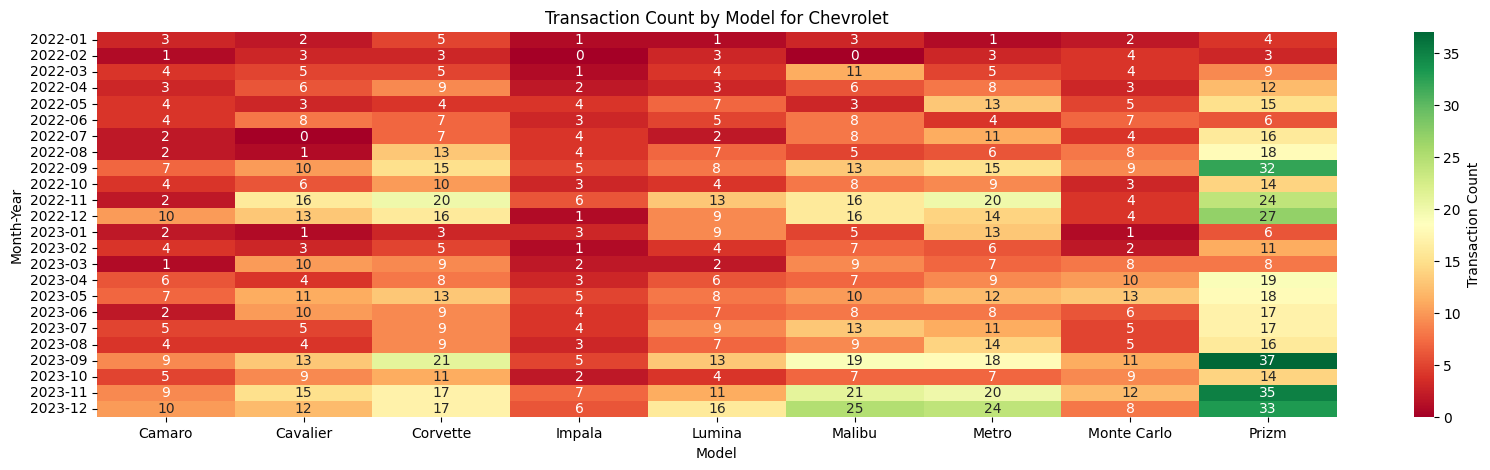

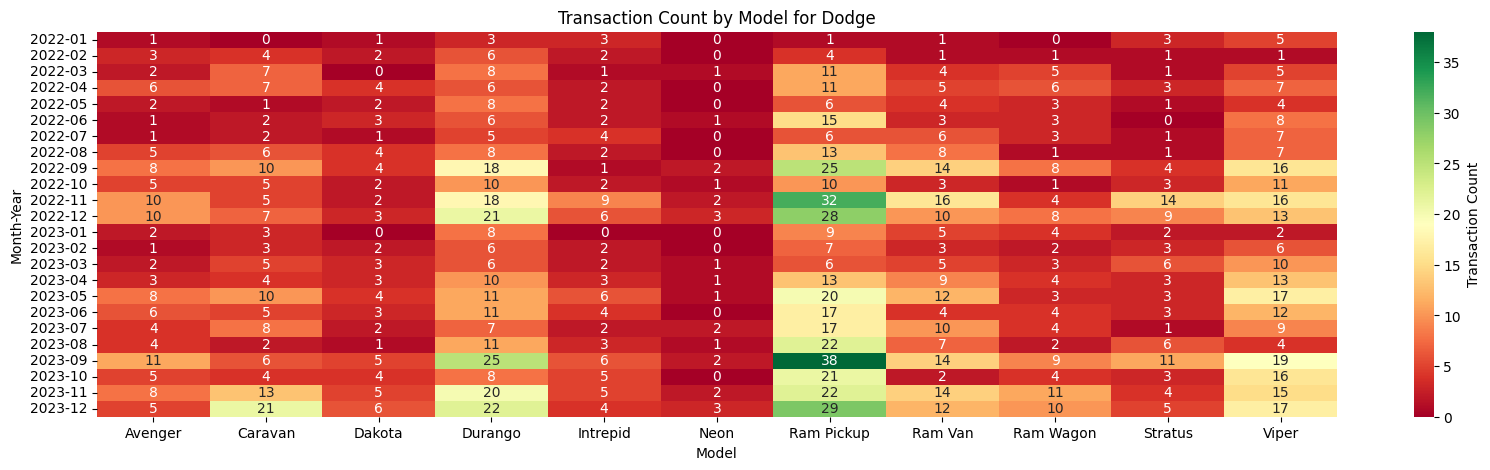

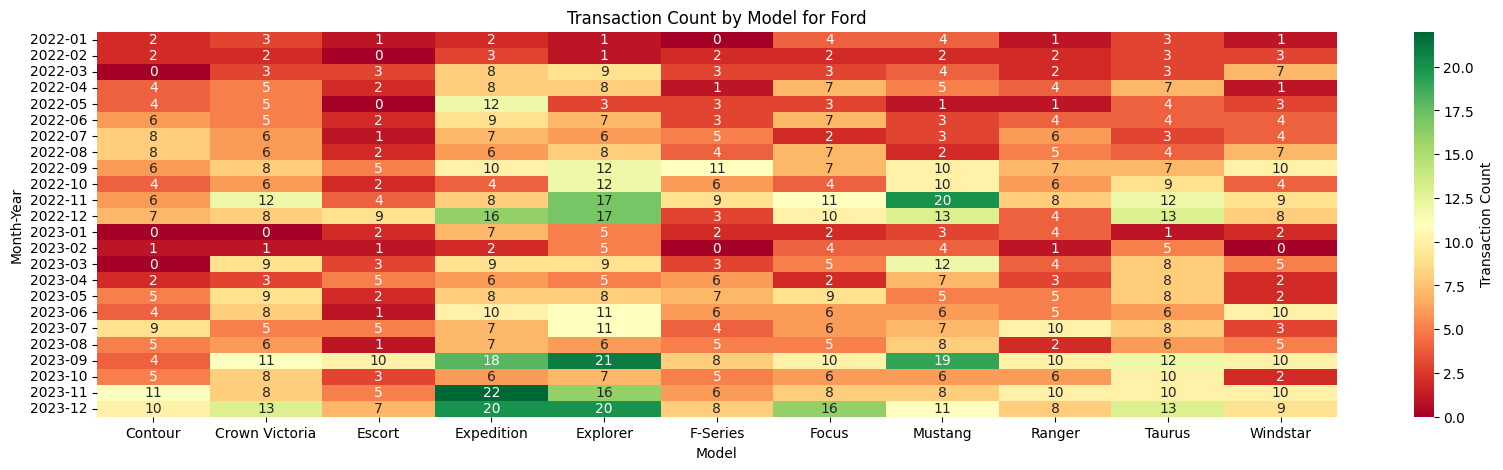

In [16]:
# Step 1: Identify the top 4 companies
top_4_companies = ranked_companies_df["Company"].head(4)

# Step 2: Filter the dataset for transactions from these top 4 companies
filtered_data = data[data["company"].isin(top_4_companies)]

# Step 3: Create a pivot table for model counts per month-year for the top 4 companies
model_transaction_pivot = filtered_data.pivot_table(
    index=["Month_Year", "company"],
    columns="model",
    values="car_id",
    aggfunc="count",
    fill_value=0,
)
model_transaction_pivot.reset_index(inplace=True)

# set the index to Month_Year
model_transaction_pivot.set_index("Month_Year", inplace=True)

# Step 4: Plot the heatmap for each company
for company, color in zip(top_4_companies, colors):
    company_pivot = model_transaction_pivot[
        model_transaction_pivot["company"] == company
    ]
    company_pivot = company_pivot.drop(columns="company")
    company_pivot = company_pivot.loc[:, (company_pivot != 0).any(axis=0)]
    plt.figure(figsize=(20, 5))
    sns.heatmap(
        company_pivot,
        annot=True,
        fmt=",.0f",
        cmap="RdYlGn",
        cbar_kws={"label": "Transaction Count"},
    )
    plt.title(f"Transaction Count by Model for {company}")
    plt.xlabel("Model")
    plt.ylabel("Month-Year")
    plt.show()

## __Step 10:__ What Was Each Month's Best Selling Model For the Top Companies?
---

In [17]:
# Step 1: Filter the dataset for transactions from the top 4 companies.
filtered_data = data[data["company"].isin(top_4_companies)]

# Step 2: Group by Month_Year, company, and model, then count transactions.
grouped = (
    filtered_data.groupby(["Month_Year", "company", "model"])
    .size()
    .reset_index(name="count")
)

# Step 3: Sort within each Month_Year and company group by transaction count.
grouped_sorted = grouped.sort_values(
    ["Month_Year", "company", "count"], ascending=[True, True, False]
)

# Step 4: Drop duplicates to keep only the top model for each Month_Year and company.
top_models_per_month = grouped_sorted.drop_duplicates(subset=["Month_Year", "company"])

# Step 5: Pivot the table to make 'company' columns, 'Month_Year' rows, and 'model' values.
pivot_top_models = top_models_per_month.pivot(
    index="Month_Year", columns="company", values="model"
).reset_index()

# Step 6: Rename the Month_Year column to Month-Year.
pivot_top_models.rename(columns={"Month_Year": "Month-Year"}, inplace=True)

# Step 7: Display the pivot table using tabulate.
print(
    tb.tabulate(
        pivot_top_models,
        headers="keys",
        tablefmt=tablefmt,
    )
)

╭────┬──────────────┬─────────────┬────────────┬────────────────┬──────────╮
│    │ Month-Year   │ Chevrolet   │ Dodge      │ Ford           │ Toyota   │
├────┼──────────────┼─────────────┼────────────┼────────────────┼──────────┤
│  0 │ 2022-01      │ Corvette    │ Viper      │ Focus          │ Tacoma   │
├────┼──────────────┼─────────────┼────────────┼────────────────┼──────────┤
│  1 │ 2022-02      │ Monte Carlo │ Durango    │ Expedition     │ Celica   │
├────┼──────────────┼─────────────┼────────────┼────────────────┼──────────┤
│  2 │ 2022-03      │ Malibu      │ Ram Pickup │ Explorer       │ RAV4     │
├────┼──────────────┼─────────────┼────────────┼────────────────┼──────────┤
│  3 │ 2022-04      │ Prizm       │ Ram Pickup │ Expedition     │ Celica   │
├────┼──────────────┼─────────────┼────────────┼────────────────┼──────────┤
│  4 │ 2022-05      │ Prizm       │ Durango    │ Expedition     │ Celica   │
├────┼──────────────┼─────────────┼────────────┼────────────────┼──────────┤

## __Step 11:__ What Was The Overall Best Selling Model For the Top Companies?
---

╭───────────┬────────────┬─────────┬─────────────────┬──────────────────────╮
│  Company  │   Model    │  Count  │  Average Price  │  Company Price Rank  │
├───────────┼────────────┼─────────┼─────────────────┼──────────────────────┤
│ Chevrolet │   Prizm    │   411   │   $22,838.46    │          1           │
├───────────┼────────────┼─────────┼─────────────────┼──────────────────────┤
│   Dodge   │ Ram Pickup │   383   │   $27,820.86    │          1           │
├───────────┼────────────┼─────────┼─────────────────┼──────────────────────┤
│   Ford    │  Explorer  │   225   │   $32,024.32    │          1           │
├───────────┼────────────┼─────────┼─────────────────┼──────────────────────┤
│  Toyota   │   Tacoma   │   179   │   $44,576.74    │          1           │
╰───────────┴────────────┴─────────┴─────────────────┴──────────────────────╯


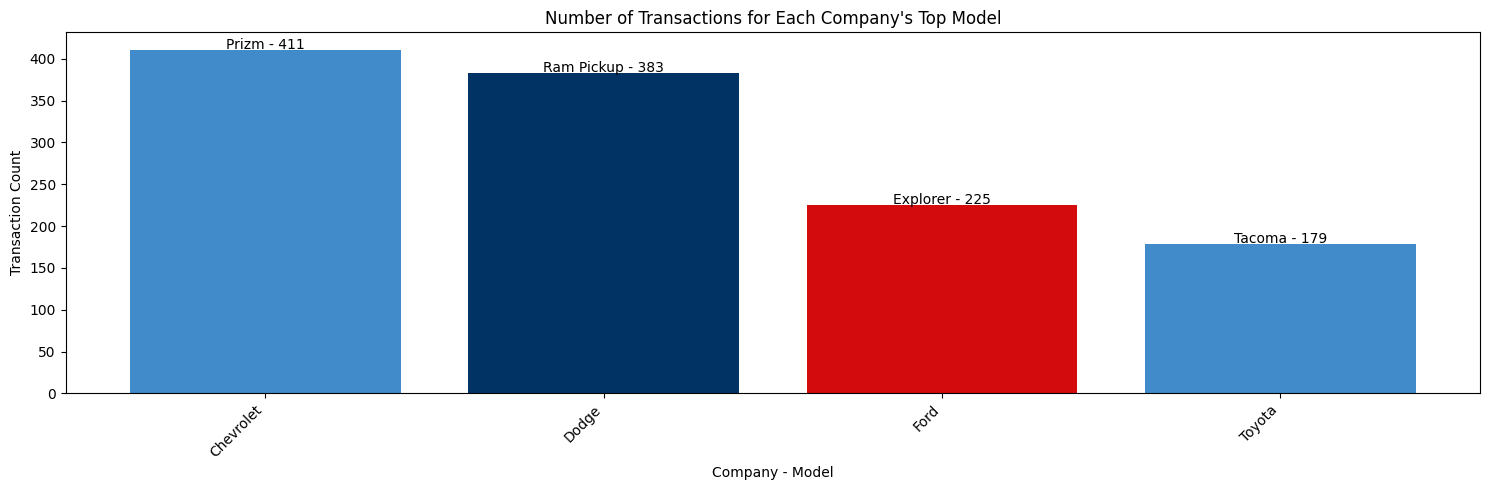

In [18]:
# Step 1: Filter the dataset for transactions from the top 4 companies.
filtered_data = data[data["company"].isin(top_4_companies)]

# Step 2: Group by company and model, then count transactions.
grouped = filtered_data.groupby(["company", "model"]).size().reset_index(name="count")

# Step 3: Sort within each company group by transaction count.
grouped_sorted = grouped.sort_values(["company", "count"], ascending=[True, False])

# Step 4: Drop duplicates to keep only the top model for each company.
top_models = grouped_sorted.drop_duplicates(subset=["company"])

# Step 5: Display the top model for each company along with the number of transactions and capitalize the headers for better readability.
top_models.columns = ["Company", "Model", "Count"]

# Step 6: Calculate the average price for each model
average_prices = filtered_data.groupby("model")["sale_price"].mean().reset_index()
average_prices.columns = ["Model", "Average Price"]
# Format the average price column with a $ sign and 2 decimal places
average_prices["Average Price"] = average_prices["Average Price"].map(
    lambda x: f"${x:,.2f}"
)

# Step 7: Merge the average prices back into the top_models DataFrame
top_models = top_models.merge(average_prices, on="Model", how="left")

# Step 8: Rank the models based on their average price within each company
top_models["Company Price Rank"] = top_models.groupby("Company")["Average Price"].rank(
    ascending=True
)

# Step 9: Print the top model for each company along with the number of transactions, average price, and price rank using tabulate.
print(
    tb.tabulate(
        top_models,
        headers="keys",
        tablefmt=tablefmt,
        showindex=False,
        numalign="center",
        stralign="center",
    )
)

# Step 10: Plot the bar chart for each company's top model and the number of transactions.
plt.figure(figsize=(15, 5))
plt.bar(
    top_models["Company"],
    top_models["Count"],
    color=colors,
)
plt.title("Number of Transactions for Each Company's Top Model")
plt.xlabel("Company - Model")
plt.ylabel("Transaction Count")

# Add the model names to the x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
for i, company in enumerate(top_models["Company"]):
    model_text = f"{top_models.iloc[i]['Model']} - {top_models.iloc[i]['Count']}"
    plt.text(i, top_models.iloc[i]["Count"] + 1.0, model_text, ha="center")

plt.tight_layout()
plt.show()

# __Conclusion/Key Findings:__
---




 __Key Findings__
 * __Regional Dynamics:__ The analysis revealed transaction price fluctuations, with the Northeast leading in average prices for most months. However, the trend shifted in March 2022, showcasing regional market variability and consumer spending trends.

 * __Sales Volume Insights:__ The Northeast's sales volume was prominently higher, indicating a significant market share. In September 2022, the Northeast achieved a staggering $15.98M in sales, far outpacing the South and West. This consistent performance throughout the analyzed period emphasizes the Northeast's vital role in the automotive market.

 * __Brand Dominance:__ Chevrolet emerged as the leading brand with the highest number of transactions, achieving dominance in 14 months out of the analyzed period. This is contrasted with Dodge and Ford, which led for 5 and 4 months, respectively, highlighting Chevrolet's market strength and consumer preference.
 
 * __Model Preferences:__ Remarkably, the top-selling model for each company also emerged as the most affordable option within their respective lineups, indicating a strong correlation between popularity and affordability. This underscores the effectiveness of targeted marketing strategies and consumer preference for value-driven purchases.
